In [65]:
#Who traveled further?
#Who won that year?

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import gmaps
import json
from config import g_key
import pprint
from geopy.distance import geodesic 

In [167]:
file = "Book2.csv"
data_csv = pd.read_csv(file)
data_csv

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,1-Feb-09,XLIII,70774,Ben Roethlisberger,Mike Tomlin,Pittsburgh Steelers,27,Kurt Warner,Ken Whisenhunt,Arizona Cardinals,...,Tampa,Florida,4,Terry McAulay,Roy Ellison,Derrick Bowers,Mark Perlman,Greg Gautreaux,Keith Ferguson,Michael Banks
1,7-Feb-10,XLIV,74059,Drew Brees,Sean Payton,New Orleans Saints,31,Peyton Manning,Jim Caldwell,Indianapolis Colts,...,Miami Gardens,Florida,14,Scott Green[4],Undrey Wash,John McGrath,Jeff Seeman,Rob Vernatchi,Greg Steed,Greg Meyer
2,6-Feb-11,XLV,103219,Aaron Rodgers,Mike McCarthy,Green Bay Packers,31,Ben Roethlisberger,Mike Tomlin,Pittsburgh Steelers,...,Arlington,Texas,6,Walt Anderson[5],Chad Brown,Kent Payne,John Hussey,Doug Rosenbaum,Scott Helverson,Mike Weatherford
3,5-Feb-12,XLVI,68658,Eli Manning,Tom Coughlin_,New York Giants,21,Tom Brady,Bill Belichick_,New England Patriots,...,Indianapolis,Indiana,4,John Parry,Carl Paganelli,Tom Stabile,Gary Arthur,Gary Cavaletto,Tony Steratore,Laird Hayes
4,3-Feb-13,XLVII,71024,Joe Flacco,John Harbaugh,Baltimore Ravens,34,Colin Kaepernick,Jim Harbaugh,San Francisco 49ers,...,New Orleans,Louisiana,3,Jerome Boger,Darrell Jenkins,Steve Stelljes,Byron Boston,Craig Wrolstad,Dino Paganelli,Joe Larrew
5,2-Feb-14,XLVIII,82529,Russell Wilson,Pete Carroll,Seattle Seahawks,43,Peyton Manning,John Fox_,Denver Broncos,...,East Rutherford,New Jersey,35,Terry McAulay,Carl Paganelli,Jim Mello,Tom Symonette,Scott Steenson,Steve Freeman,Dave Wyant
6,1-Feb-15,XLIX,70288,Tom Brady,Bill Belichick_,New England Patriots,28,Russell Wilson,Pete Carroll,Seattle Seahawks,...,Glendale,Arizona,4,Bill Vinovich,Bill Schuster,Dana McKenzie,Mark Perlman,Bob Waggoner,Terrence Miles,Tom Hill
7,7-Feb-16,L,71088,Peyton Manning,Gary Kubiak,Denver Broncos,24,Cam Newton,Ron Rivera,Carolina Panthers,...,Santa Clara,California,14,Clete Blakeman,Jeff Rice,Wayne Mackie,Rusty Baynes,Boris Cheek,Keith Ferguson,Scott Edwards
8,5-Feb-17,LI,70807,Tom Brady,Bill Belichick_,New England Patriots,34,Matt Ryan,Dan Quinn,Atlanta Falcons,...,Houston,Texas,6,Carl Cheffers,Dan Ferrell,Kent Payne,Jeff Seeman,Doug Rosenbaum,Todd Prukop,Dyrol Prioleau
9,4-Feb-18,LII,67612,Nick Foles,Doug Pederson,Philadelphia Eagles,41,Tom Brady,Bill Belichick_,New England Patriots,...,Minneapolis,Minnesota,8,Gene Steratore,Roy Ellison,NaN,Byron Boston,Tom Hill,Perry Paganelli,Scott Edwards


In [168]:
winner_city = data_csv['Winner']
winner_city = pd.DataFrame(winner_city)
winner_city

winner_city.insert(1,"City",['Pittsburgh','New Orleans','Green Bay','New York City','Baltimore','Seattle','Foxborough','Denver','Foxborough','Philadelphia','Foxborough'])
winner_city


,Winner,City
0,Pittsburgh Steelers,Pittsburgh
1,New Orleans Saints,New Orleans
2,Green Bay Packers,Green Bay
3,New York Giants,New York City
4,Baltimore Ravens,Baltimore
5,Seattle Seahawks,Seattle
6,New England Patriots,Foxborough
7,Denver Broncos,Denver
8,New England Patriots,Foxborough
9,Philadelphia Eagles,Philadelphia


In [169]:
loser_city = data_csv['Loser']
loser_city = pd.DataFrame(loser_city)
loser_city.insert(1,"City",['Phoenix','Indianapolis','Pittsburg','Foxborough','San Francisco','Denver','Seattle','Charlotte','Atlanta','Foxborough','Los Angeles'])
loser_city

,Loser,City
0,Arizona Cardinals,Phoenix
1,Indianapolis Colts,Indianapolis
2,Pittsburgh Steelers,Pittsburg
3,New England Patriots,Foxborough
4,San Francisco 49ers,San Francisco
5,Denver Broncos,Denver
6,Seattle Seahawks,Seattle
7,Carolina Panthers,Charlotte
8,Atlanta Falcons,Atlanta
9,New England Patriots,Foxborough


In [170]:
gmaps.configure(g_key)

In [15]:
winner_city = ['Pittsburgh',
               'New Orleans',
               'Green Bay',
               'New York City',
               'Baltimore',
               'Seattle',
               'Foxborough',
               'Denver',
               'Foxborough',
               'Philadelphia',
               'Foxborough']

winner_cities=pd.DataFrame({'City':winner_city})


# loop so that it fill up my dataframe:

for index,row in winner_cities.iterrows():
    # Build the endpoint URL
    city=row['City']
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, g_key)
    
# Run a request to endpoint and convert result to json
    response = requests.get(target_url).json()
    results= response['results']
    try:
        print(f"Processing request for {city}.")
        winner_cities.loc[index, 'lat'] = results[0]['geometry']['location']['lat']
        winner_cities.loc[index, 'lng'] = results[0]['geometry']['location']['lng']
    except(KeyError, IndexError):
        print('City not found, skipping')
        next
    print('===========================')
winner_cities
winner_cities = pd.DataFrame(winner_cities)
winner_cities

Processing request for Pittsburgh.
Processing request for New Orleans.
Processing request for Green Bay.
Processing request for New York City.
Processing request for Baltimore.
Processing request for Seattle.
Processing request for Foxborough.
Processing request for Denver.
Processing request for Foxborough.
Processing request for Philadelphia.
Processing request for Foxborough.


,City,lat,lng
0,Pittsburgh,40.440625,-79.995886
1,New Orleans,29.951066,-90.071532
2,Green Bay,44.513319,-88.013296
3,New York City,40.712775,-74.005973
4,Baltimore,39.290385,-76.612189
5,Seattle,47.606209,-122.332071
6,Foxborough,42.065381,-71.247825
7,Denver,39.739236,-104.990251
8,Foxborough,42.065381,-71.247825
9,Philadelphia,39.952584,-75.165222


In [22]:
loser_city = ['Phoenix',
              'Indianapolis',
              'Pittsburg',
              'Foxborough',
              'San Francisco',
              'Denver',
              'Seattle',
              'Charlotte',
              'Atlanta',
              'Foxborough',
              'Los Angeles']

loser_cities=pd.DataFrame({'City':loser_city})


# loop so that it fill up my dataframe:

for index,row in loser_cities.iterrows():
    # Build the endpoint URL
    city=row['City']
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, g_key)
    
# Run a request to endpoint and convert result to json
    response = requests.get(target_url).json()
    results= response['results']
    try:
        print(f"Processing request for {city}.")
        loser_cities.loc[index, 'lat'] = results[0]['geometry']['location']['lat']
        loser_cities.loc[index, 'lng'] = results[0]['geometry']['location']['lng']
    except(KeyError, IndexError):
        print('City not found, skipping')
        next
    print('===========================')
loser_cities
loser_cities = pd.DataFrame(loser_cities)
loser_cities

Processing request for Phoenix.
Processing request for Indianapolis.
Processing request for Pittsburg.
Processing request for Foxborough.
Processing request for San Francisco.
Processing request for Denver.
Processing request for Seattle.
Processing request for Charlotte.
Processing request for Atlanta.
Processing request for Foxborough.
Processing request for Los Angeles.


,City,lat,lng
0,Phoenix,33.448377,-112.074037
1,Indianapolis,39.768403,-86.158068
2,Pittsburg,38.027976,-121.884681
3,Foxborough,42.065381,-71.247825
4,San Francisco,37.774929,-122.419415
5,Denver,39.739236,-104.990251
6,Seattle,47.606209,-122.332071
7,Charlotte,35.227087,-80.843127
8,Atlanta,33.748995,-84.387982
9,Foxborough,42.065381,-71.247825


In [20]:
winner_cities

,City,lat,lng
0,Pittsburgh,40.440625,-79.995886
1,New Orleans,29.951066,-90.071532
2,Green Bay,44.513319,-88.013296
3,New York City,40.712775,-74.005973
4,Baltimore,39.290385,-76.612189
5,Seattle,47.606209,-122.332071
6,Foxborough,42.065381,-71.247825
7,Denver,39.739236,-104.990251
8,Foxborough,42.065381,-71.247825
9,Philadelphia,39.952584,-75.165222


In [30]:
winner_cities

,City,lat,lng
0,Pittsburgh,40.440625,-79.995886
1,New Orleans,29.951066,-90.071532
2,Green Bay,44.513319,-88.013296
3,New York City,40.712775,-74.005973
4,Baltimore,39.290385,-76.612189
5,Seattle,47.606209,-122.332071
6,Foxborough,42.065381,-71.247825
7,Denver,39.739236,-104.990251
8,Foxborough,42.065381,-71.247825
9,Philadelphia,39.952584,-75.165222


In [177]:
#stadium location coordinates
file = "sb_data.csv"
sb_csv = pd.read_csv(file)
sb_csv.head(40)

,City,Lat,Lng
0,Los Angeles,34.052234,-118.243685
1,Miami,25.761680,-80.191790
2,New Orleans,29.951066,-90.071532
3,Houston,29.760427,-95.369803
4,Pasadena,34.147785,-118.144515
5,Pontiac,42.638922,-83.291047
6,Tampa,27.950575,-82.457178
7,Palo Alto,37.441883,-122.143020
8,San Diego,32.715738,-117.161084
9,Miami Gardens,25.943753,-80.244787


In [48]:
import geopy.distance
win = (42.065381,-71.247825)
stadium = (33.748995,-84.387982)
print(geopy.distance.distance(win, stadium).mi)

917.1510542999843


In [49]:
import geopy.distance
lose = (34.052234,-118.243685)
stadium = (33.748995,-84.387982)
print(geopy.distance.distance(lose, stadium).mi)

1936.852157508727


In [27]:
loser_cities

,City,lat,lng
0,Phoenix,33.448377,-112.074037
1,Indianapolis,39.768403,-86.158068
2,Pittsburg,38.027976,-121.884681
3,Foxborough,42.065381,-71.247825
4,San Francisco,37.774929,-122.419415
5,Denver,39.739236,-104.990251
6,Seattle,47.606209,-122.332071
7,Charlotte,35.227087,-80.843127
8,Atlanta,33.748995,-84.387982
9,Foxborough,42.065381,-71.247825


In [62]:
#import csv of results after calculating
#create graph to compare
file2 = 'Coordinates.csv'
coords = pd.read_csv(file2)
coords

,Winning Team,Winner Distance Traveled (mi),Losing Team,Loser Distance Traveled (mi),Stadium,Unnamed: 5
0,Pittsburg,1796.809000,Arizona,1796.809000,Tampa,NaN
1,New Orleans,660.872018,Indianapolis,1012.219437,Miami Gardens,NaN
2,Green Bay,948.408597,Pittsburg,1440.867712,Arlington,NaN
3,New York City,645.308357,Foxborough,795.309464,Indianapolis,NaN
4,Baltimore,510.798401,San Francisco,1949.557924,New Orleans,NaN
5,Seattle,2400.061639,Denver,1625.637187,East Rutherford,NaN
6,Foxborough,2585.909601,Seattle,952.920973,Glendale,NaN
7,Denver,932.105355,Charlotte,2281.400136,Santa Clara,NaN
8,Foxborough,1588.257300,Atlanta,701.982487,Houston,NaN
9,Philadelphia,985.245680,Foxborough,1120.560072,Minneapolis,NaN


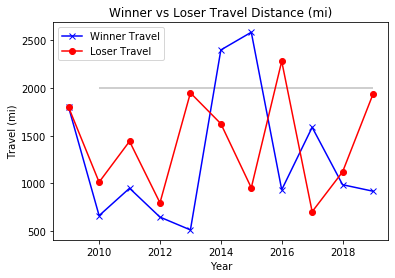

In [77]:
#graph

year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
winners = coords['Winner Distance Traveled (mi)']
losers = coords['Loser Distance Traveled (mi)']

# x_axis = winners
# y_axis = losers

winners = plt.plot(year, winners, color="b", marker="x", label="Winner Travel")
losers = plt.plot(year, losers, color="r", marker="o", label="Loser Travel")
plt.title("Winner vs Loser Travel Distance (mi)")
plt.xlabel("Year")
plt.ylabel("Travel (mi)")
plt.hlines(2000, 2010, 2019, alpha=0.25)
plt.legend(loc="upper left")
plt.savefig("Distance_Traveled.png")
plt.show()